In [93]:
#https://blog.csdn.net/u013610563/article/details/77527507
#https://blog.csdn.net/weixin_40327927/article/details/88584084?utm_medium=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.edu_weight&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-BlogCommendFromMachineLearnPai2-1.edu_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [82]:
# Read csv file
df = pd.read_csv('coursework_1_data_2019.csv')

In [86]:
# Drop the columns that are not relevant to the research 
df.drop(columns=['total_budget','clean_air','clean_environ','health_training',
                 'school_awareness','media_awareness','sub_counselling','region','local_authority_type'], inplace=True)
df.shape

(152, 19)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

In [88]:
# Calculate the male and female obesity case number per 1,000 people
# The data type of both datasets are interval
df['2008_male_rate_per1000']=round(df['2008_cases_male']/df['2008_pop_male']*1000,2)
df['2008_female_rate_per1000']=round(df['2008_cases_female']/df['2008_pop_female']*1000,2)
df['2013_male_rate_per1000']=round(df['2013_cases_male']/df['2013_pop_male']*1000,2)
df['2013_female_rate_per1000']=round(df['2013_cases_female']/df['2013_pop_female']*1000,2)
df['2018_male_rate_per1000']=round(df['2018_cases_male']/df['2018_pop_male']*1000,2)
df['2018_female_rate_per1000']=round(df['2018_cases_female']/df['2018_pop_female']*1000,2)

In [89]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,2008_male_rate_per1000,2008_female_rate_per1000,2013_male_rate_per1000,2013_female_rate_per1000,2018_male_rate_per1000,2018_female_rate_per1000
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,533,88794,97115,103796,2.23,4.57,2.32,4.42,2.95,5.14
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,481,171375,182529,194186,1.25,1.91,1.26,2.14,1.81,2.48
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,315,116371,126724,130828,1.34,1.82,1.59,2.09,1.67,2.41
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,338,91599,88898,98444,1.80,3.26,1.53,3.28,1.72,3.43
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,211,82256,79733,87854,1.82,2.10,1.70,2.28,1.89,2.40


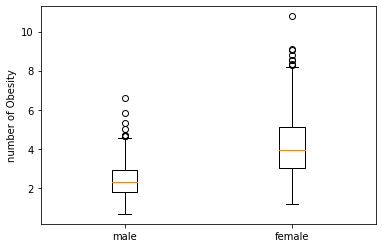

In [234]:
# Boxplot Number of Obesity(per 1000 male/female population)
df_2018=df['2018_male_rate_per1000'],df['2018_female_rate_per1000']
plt.boxplot(df_2018)
plt.xticks([1,2], ["male",'female'])
plt.ylabel("number of Obesity")
# And save the boxplot
plt.savefig('gender_boxpolt')

In [158]:
# Then discribe the boxplots
df['2018_male_rate_per1000'].describe(),df['2018_female_rate_per1000'].describe()

(count    152.000000
 mean       2.469934
 std        0.987957
 min        0.680000
 25%        1.810000
 50%        2.330000
 75%        2.920000
 max        6.590000
 Name: 2018_male_rate_per1000, dtype: float64,
 count    152.000000
 mean       4.345526
 std        1.839195
 min        1.180000
 25%        3.037500
 50%        3.960000
 75%        5.140000
 max       10.780000
 Name: 2018_female_rate_per1000, dtype: float64)

In [259]:
# Count the areas that female obesity rate is higher or lower than male obesity rate and summarize the proportion
df['2018_female>male']=df['2018_female_rate_per1000']>df['2018_male_rate_per1000']
female_more=0
male_more=0
for i in df['2018_female>male']:
    if i==True:
        female_more+=1
    else:
        male_more+=1
female_more_proportion=round(female_more/(female_more+male_more),4)
male_more_proportion=round(male_more/(female_more+male_more),4)
print('Number of areas that the female obesity rate is higher than male obesity rate:',female_more)
print('Number of areas that the female obesity rate is lower than male obesity rate:',male_more) 
print('The proportion of the area female obesity rate is higher:',female_more_proportion)
print('The proportion of the area male obesity rate is higher:',male_more_proportion)

Number of areas that the female obesity rate is higher than male obesity rate: 150
Number of areas that the female obesity rate is lower than male obesity rate: 2
The proportion of the area female obesity rate is higher: 0.9868
The proportion of the area male obesity rate is higher: 0.0132


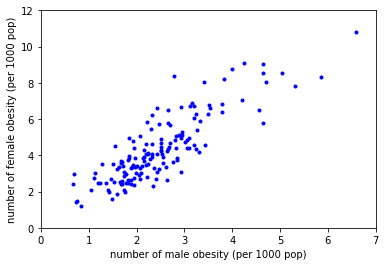

In [270]:
# Plot a scatter diagram
# Creates the endpoints of the best-fit line
x_lobf = [min(df['2018_male_rate_per1000']),max(df['2018_male_rate_per1000'])]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
#set the axis limits
x_min,x_max = 0,7
y_min,y_max = 0,12
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
# Create and save the plot
plt.plot(df['2018_male_rate_per1000'],Y_2018_female_rate,'b.')
plt.xlabel('number of male obesity (per 1000 pop)')
plt.ylabel('number of female obesity (per 1000 pop)')
plt.savefig('scatter_plot')

In [266]:
# Caculate the Pearson Correlation Coefficient between male and female rate
r = np.corrcoef(df['2018_male_rate_per1000'], df['2018_female_rate_per1000'])
print('The Pearson Correlation Coefficient is:',round(r[0][1],4)
#当相关系数为1时，成为完全正相关；当相关系数为-1时，成为完全负相关；相关系数的绝对值越大，相关性越强；相关系数越接近于0，相关度越弱。

The Pearson Correlation Coefficient is: 0.8499


In [207]:
# Perform the Simple linear Regression procedure:
X_2018_male_rate = sms.add_constant(df['2018_male_rate_per1000'])
Y_2018_female_rate = df['2018_female_rate_per1000']
regression_model_a = sms.OLS(Y_2018_female_rate, X_2018_male_rate)
regression_model_b = regression_model_a.fit()
# And print a summary of the results:
print(regression_model_b.summary())

                               OLS Regression Results                               
Dep. Variable:     2018_female_rate_per1000   R-squared:                       0.722
Model:                                  OLS   Adj. R-squared:                  0.721
Method:                       Least Squares   F-statistic:                     390.3
Date:                      Sun, 08 Nov 2020   Prob (F-statistic):           1.39e-43
Time:                              18:37:58   Log-Likelihood:                -210.41
No. Observations:                       152   AIC:                             424.8
Df Residuals:                           150   BIC:                             430.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [208]:
# Store all the relevant values
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue
# And print them
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = 1.5822167420413489
intercept = 0.437555056154056
Rsquared  = 0.7223582262719135
MSE       = 0.9454223582630622
pvalue    = 1.3933609814402513e-43


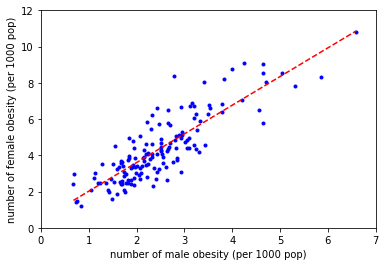

In [272]:
# Plot the regression
# Creates the endpoints of the best-fit line
x_lobf = [min(df['2018_male_rate_per1000']),max(df['2018_male_rate_per1000'])]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]
#set the axis limits
x_min,x_max = 0,7
y_min,y_max = 0,12
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
# Create and save the plot
plt.plot(df['2018_male_rate_per1000'],Y_2018_female_rate,'b.',x_lobf,y_lobf,'r--')
plt.xlabel('number of male obesity (per 1000 pop)')
plt.ylabel('number of female obesity (per 1000 pop)')
plt.savefig('regression_figure')

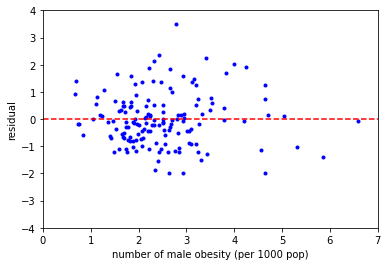

In [271]:
# Residuals vs Fits Plot
x_lobf = [0,7]
y_lobf = [0,0]
x_min,x_max = 0,7
y_min,y_max = -4,4
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])
df['2018_residual'] = df['2018_female_rate_per1000'] - (df['2018_male_rate_per1000']*gradient + intercept)
plt.plot(df['2018_male_rate_per1000'],df['2018_residual'],'b.',x_lobf,y_lobf,'r--')
plt.xlabel('number of male obesity (per 1000 pop)')
plt.ylabel('residual')
plt.savefig('regression_residual')